In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os
import pandas as pd
from astropy import constants as const

x=np.arange(4000,7000,0.001)
t_x = np.arange(4000,7000,1)

total_f_ratio = 5.15
ratio_6560 = 6560.47 / 1025.27

def R_Flux(F0,lam,lam_i,del_lam_i, ratio , flux_L , eff , Fc):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2/2) 
    return ((fl) / ratio**2) * (eff * flux_L) + Fc

def Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def Data_R_Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def total_flux(f,x ,fc):
    ft = 0
    dx = x[1]- x[0]
    for ii, flux in enumerate(f) :
        ft += (flux-fc)*dx #*x[ii] 
    return ft

def test_flux(f,x):
    flux = f*x *np.sqrt(2*np.pi)
    return flux

In [2]:
cc = const.c.to('km/s').value
cc

299792.458

17.599999999999454
5000
Total flux of RCE 1 case is =  1.0238504035072292e-12
Total flux of Observed case is =  2.1654260338882302e-13
RCE of ratio is  0.2114982839749343


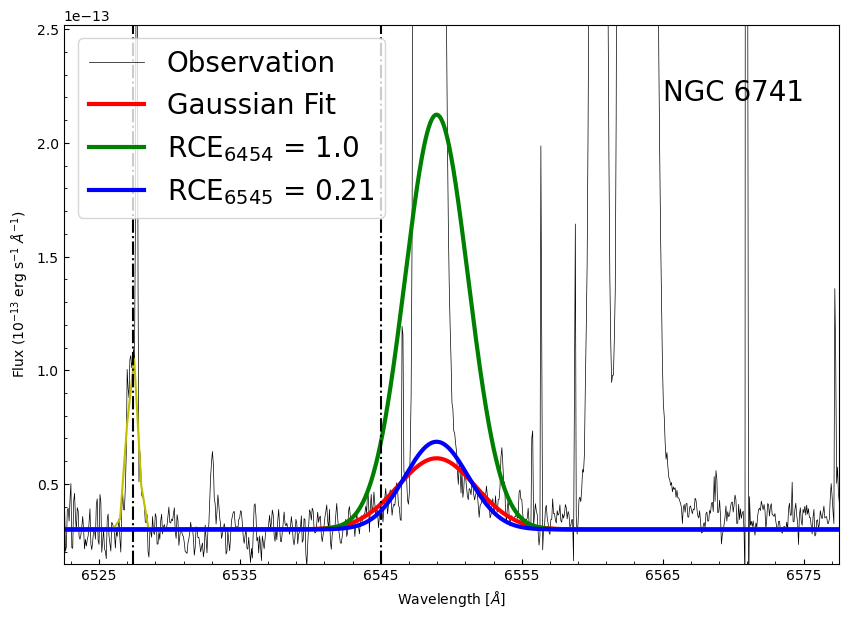

In [3]:
fig=plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()

Fc = 0.3e-13
F_0 = (1.48e-12 - Fc)
he_line = 6560.47
r_he_line = 6548.96  

sigma = 0.35
F_Raman_D = (6.13e-14 - Fc)
sigma_D = 2.76 

# plt.subplot(121)
plt.plot(lam,flux,'k',lw=0.5,label='Observation')
f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
# plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
aa= np.argmax(f_DR)
# plt.text(x[aa],f_DR[aa],'Raman 6545')
# xx = np.linspace(0.1,0.2,4)
# for ii in xx :
ratio = 6560.47 / 1025.27
    # sigma= 0.343

ef = 1.0
f_R_1 =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x,f_R_1,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6454},ef))


x_6527 = np.arange(6510,6530,0.5)
F_6527_p = (1.09e-13 - Fc)
lam_6527 = 6527.38 
sig_6527 = 0.37
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527,'y')

# plt.title('NGC 6741')
x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.text(x_max-10,F_6527_p*2.77 ,'NGC 6741',size=20)

# plt.rc('text', usetex=True)  # LaTeX 사용을 활성화

# plt.yticks(np.linspace(Fc*0.5,F_6527_p*3 + Fc*0.5,4))
lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
print(del_lam)
plt.vlines(lam_6527,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(lam_6527+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x_flux,r_he_line,sigma_D,Fc)

ef = 1.0
f_R_1 =R_Flux(F_0,x_flux,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

# ef = 0.17
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
# plt.plot(x,f_R,'c',lw=3,label=r'Eye, RCE$_{0}$ = {1}'.format({6545},ef))

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))

plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux ($10^{-13}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)
# ax = plt.gca()
# plt.yticks([1,2,3])

plt.legend(loc='upper left',fontsize=20)
plt.minorticks_on()
plt.tick_params(axis='both', direction='in', which='both')
# plt.show()




In [4]:
x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x_flux,r_he_line,sigma_D,Fc)

ef = 1.0
f_R_1 =R_Flux(F_0,x_flux,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)



x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x_flux,r_he_line,sigma_D,Fc)

ef = 1.0
f_R_1 =R_Flux(F_0,x_flux,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)


F_Raman_D = (6.13e-14)
sigma_D = 2.76 
tot_f_obv_ram = test_flux(F_Raman_D,2.76)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

5000
Total flux of RCE 1 case is =  1.0238504035072292e-12
Total flux of Observed case is =  2.1654260338882302e-13
RCE of ratio is  0.2114982839749343
5000
Total flux of RCE 1 case is =  1.0238504035072292e-12
Total flux of Observed case is =  4.2409142452826964e-13
RCE of ratio is  0.41421229417455147


(6522.5, 6577.5)

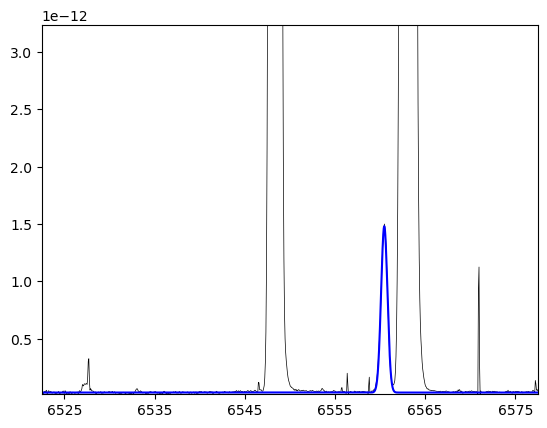

In [5]:
plt.plot(lam,flux,'k',lw=0.5,label='Observation')
plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*100)
x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)

5000
Total flux of RCE 1 case is =  1.1887199748284034e-12
Total flux of Observed case is =  8.974105217420182e-14
RCE of ratio is  0.07549385395593804


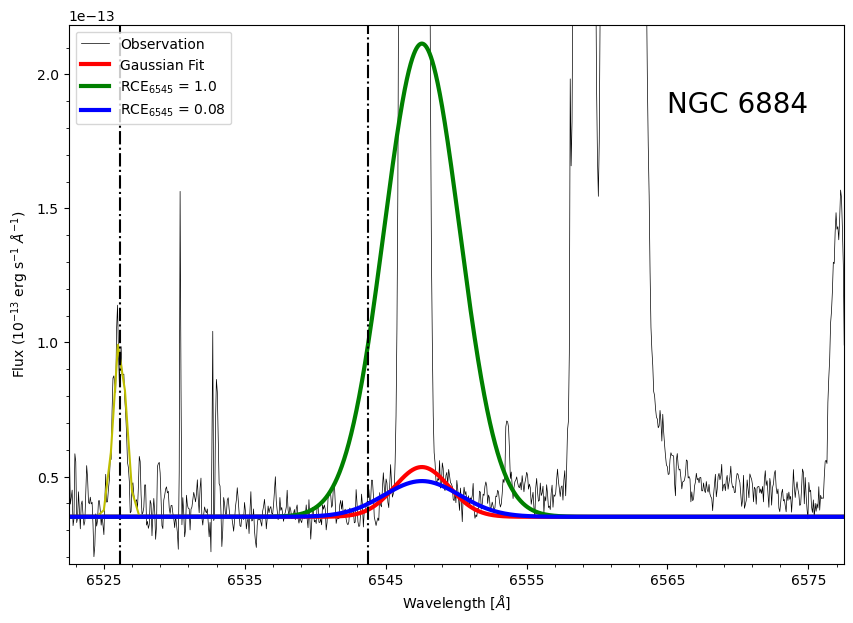

In [6]:
# NGC 6884
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.35e-13
vel = 16.855
he_line = 6559.12  
r_he_line = 6547.57
F_0 = 1.43791e-12 - Fc
sigma = 0.42

F_Raman_D = 5.355e-14 - Fc
sigma_D = 1.93

plt.plot(lam,flux,'k',lw=0.5,label='Observation')
f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
# plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')


# ii = 0.098
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc) 
# plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))
# aa = np.argmax(f_R)
# plt.text(x[aa],f_R[aa],'Raman 6545')

ii = 1.0
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))





x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 1.02e-13 - Fc
lam_6527 = 6526.13 
sig_6527 = 0.44 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527,'y')

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.text(x_max-10,F_6527_p*2.77 ,'NGC 6884',size=20)


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(lam_6527+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')


x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x_flux,r_he_line,sigma_D,Fc)
ef = 1.0
f_R_1 =R_Flux(F_0,x_flux,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))

plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux ($10^{-13}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)
plt.yticks([0.5e-13,1.0e-13,1.5e-13,2.0e-13])
# plt.yticks()

plt.legend(loc='upper left')
plt.minorticks_on()


(6522.5, 6577.5)

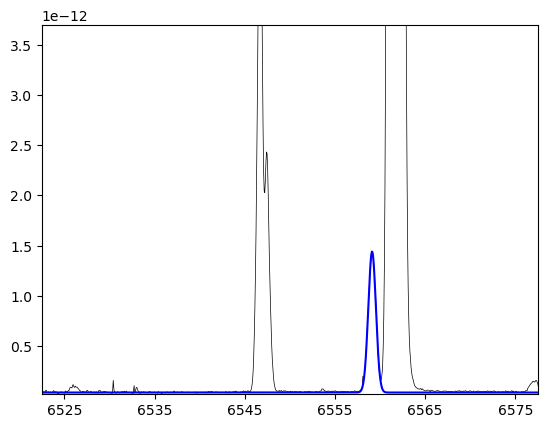

In [7]:
plt.plot(lam,flux,'k',lw=0.5,label='Observation')
plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*100)
x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)

5000
Total flux of RCE 1 case is =  2.8294585042736677e-13
Total flux of Observed case is =  6.843095189742563e-14
RCE of ratio is  0.24185175995359615


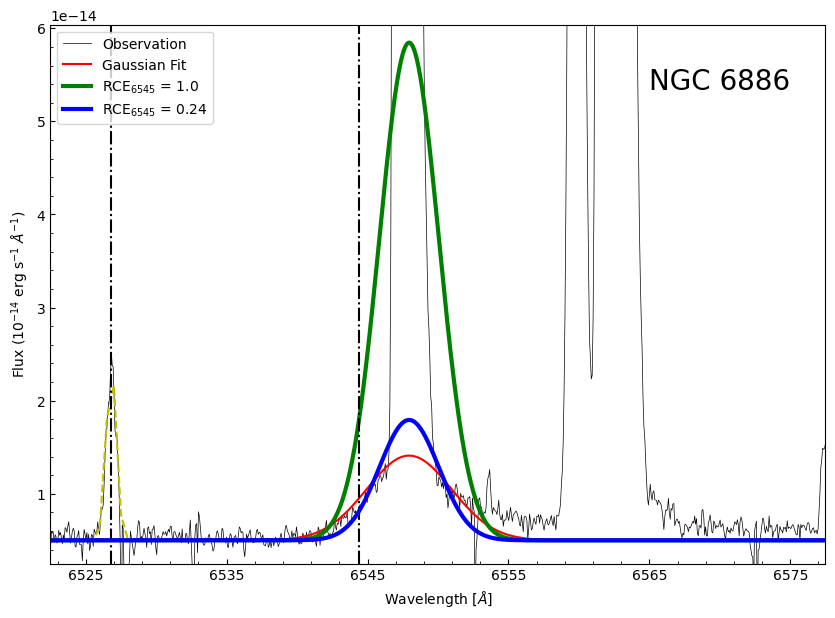

In [8]:
# NGC 6886
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.5e-14
vel = 16.855
he_line = 6559.83 
r_he_line =  6547.95 
sigma = 0.33


F_0 = 4.30e-13 - Fc
F_Raman_D = 1.41e-14 - Fc
sigma_D = 3.0

plt.plot(lam,flux,'k',lw=0.5,label='Observation')
f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)

# plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',label='Gaussian Fit')
aa = np.argmax(f_DR)
# plt.text(x[aa],f_DR[aa],'Raman 6545')

# xx = np.linspace(0.1,0.2,5)
# for ii in xx :
#     # ratio = 6560 / 1025
#     # sigma= 0.32
# ii = 0.17
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc)
# plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))
ii = 1.0
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))




x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 2.43e-14 - Fc
lam_6527 = 6526.81 
sig_6527 = 0.35 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527,'y--')

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xticks(np.linspace(x_min,x_max,6))
# plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)

plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)
plt.text(x_max-10,F_6527_p*2.77 ,'NGC 6886',size=20)

lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(lam_6527+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x_flux,r_he_line,sigma_D,Fc)
ef = 1.0
f_R_1 =R_Flux(F_0,x_flux,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))

plt.minorticks_on()
plt.tick_params(axis='both', direction='in', which='both')

plt.legend(loc='upper left')


(6522.5, 6577.5)

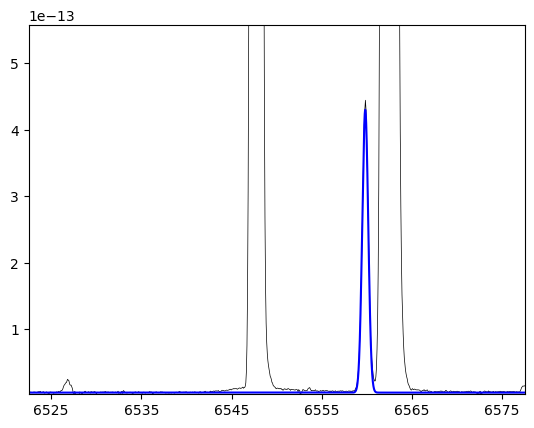

In [9]:
plt.plot(lam,flux,'k',lw=0.5,label='Observation')
plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*100)
x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)

5000
Total flux of RCE 1 case is =  7.292308427845795e-13
Total flux of Observed case is =  1.189645779131965e-14
RCE of ratio is  0.016313706296202223


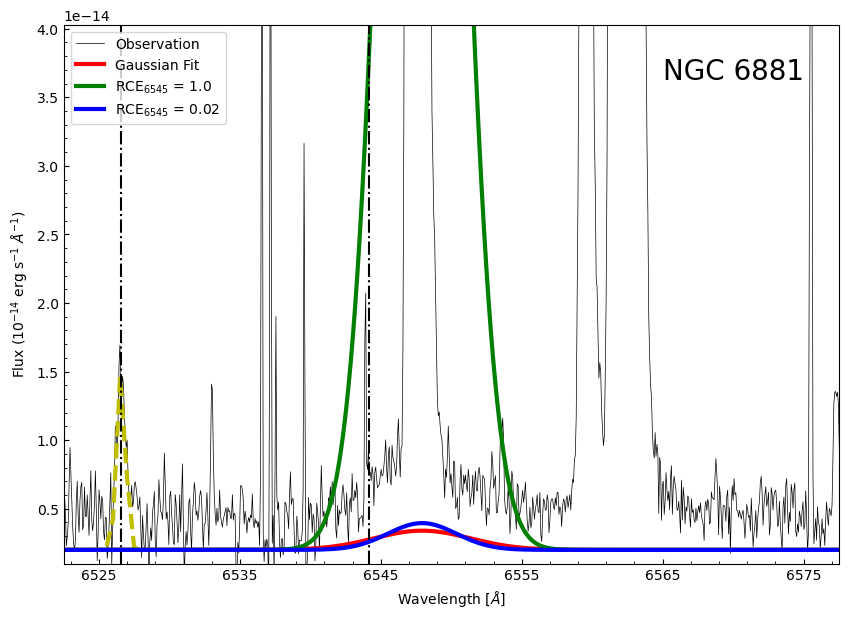

In [10]:
# NGC 6881
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.2e-14
vel = 16.855
he_line = 6559.57
r_he_line =  6547.93
sigma = 0.38


F_0 = 9.5322e-13 - Fc
# F_0 = 2.93e-13 - Fc
F_Raman_D = 3.4e-15 - Fc
# sigma_D =2.94
sigma_D = 3.39
# sigma_D =1.94
# plt.subplot(121)
plt.plot(lam,flux,'k',lw=0.5,label='Observation')

f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
aa= np.argmax(f_DR)
# plt.text(x[aa],f_DR[aa],'Raman 6545')



x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 1.51e-14 - Fc
lam_6527 =6526.58
sig_6527 = 0.31 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)
plt.minorticks_on()

plt.text(x_max-10,F_6527_p*2.77 ,'NGC 6881',size=20)

# xx = np.linspace(0.1,0.2,5)
# for ii in xx :
    # ratio = 6560 / 1025
    # sigma= 0.32
# ii = 0.2
# #total_f_ratio
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc) 
# plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

ii = 1.0
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(lam_6527+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
# # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x_flux,r_he_line,sigma_D,Fc)
ef = 1.0
f_R_1 =R_Flux(F_0,x_flux,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.tick_params(axis='both', direction='in', which='both')
plt.legend(loc='upper left')
# plt.legend()


In [11]:
x = np.arange(6000,7000,0.01)

Total flux of RCE 1 case is =  2.1405756388880677e-13
Total flux of Observed case is =  3.957414587421912e-14
RCE of ratio is  0.18487618543008413
5000
Total flux of RCE 1 case is =  1.1887199748284073e-12
Total flux of Observed case is =  8.974105217420155e-14
RCE of ratio is  0.07549385395593755
Total flux of RCE 1 case is =  2.8261297295627535e-13
Total flux of Observed case is =  5.281465774647502e-14
RCE of ratio is  0.18687980666282533


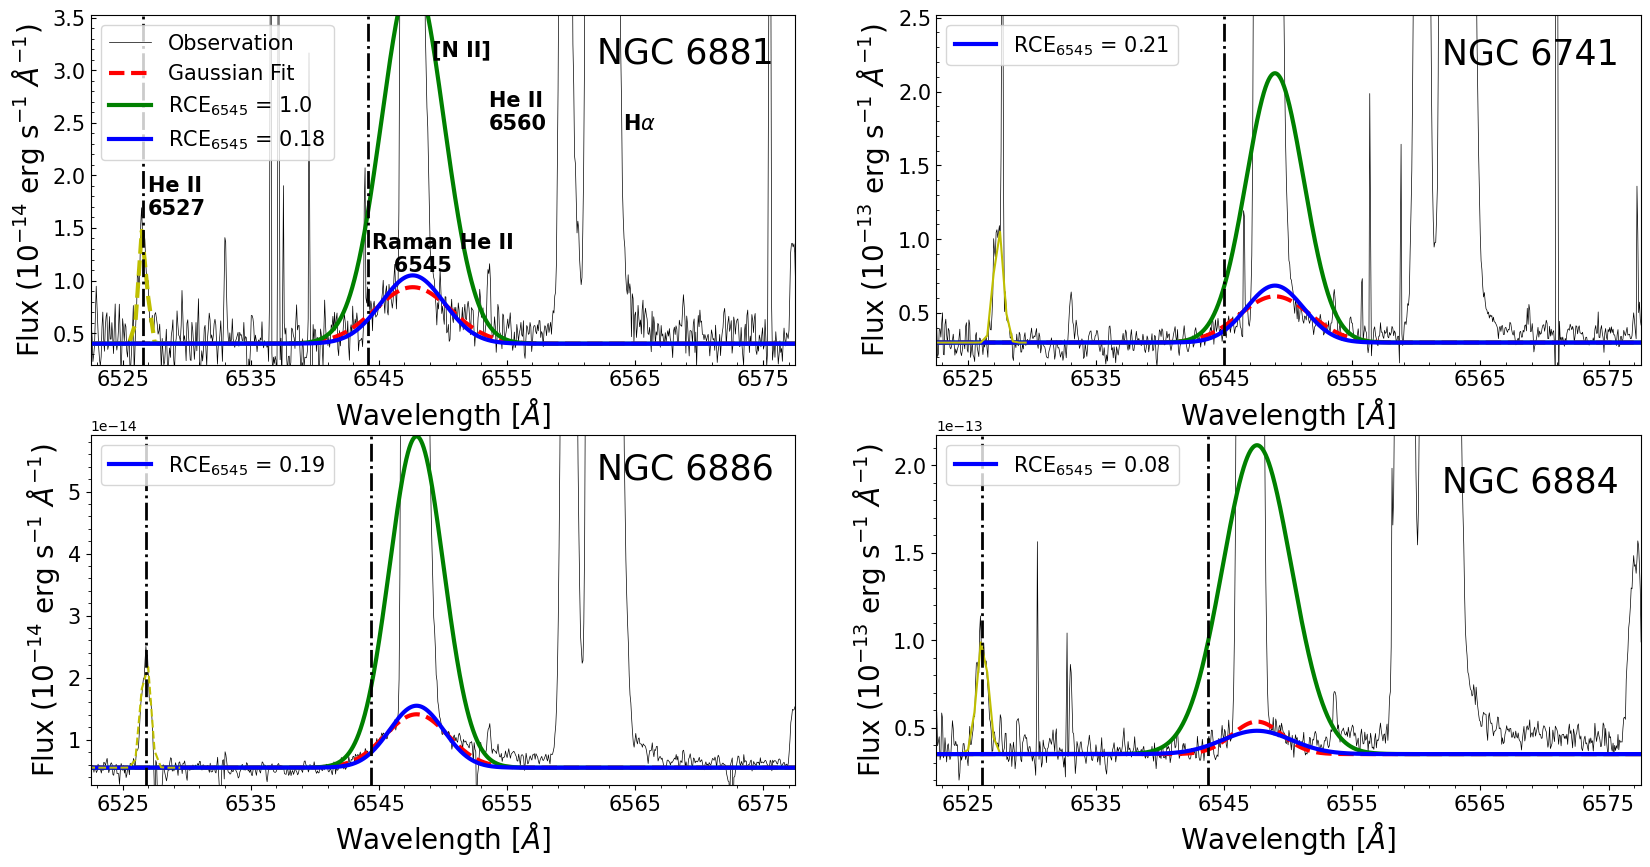

In [12]:
fig=plt.figure(1,figsize=(20,10))

plt.subplot(221)
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.4e-14
vel = 16.855
he_line = 6559.57
r_he_line =  6547.65
sigma = 0.38


F_0 = 2.8322e-13 - Fc
# F_0 = 2.93e-13 - Fc
F_Raman_D = 9.37e-15 - Fc
sigma_D =2.94
# sigma_D =1.94
# plt.subplot(121)

yy_f  = 1e14
plt.plot(lam,flux*yy_f,'k',lw=0.5,label='Observation')

f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR*yy_f,'r--',lw=3,label='Gaussian Fit')
aa= np.argmax(f_DR)
# plt.text(x[aa],f_DR[aa],'Raman 6545')



x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 1.509e-14 - Fc
lam_6527 =6526.58
sig_6527 = 0.31 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527*yy_f,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=20)
plt.xlabel(r'Wavelength $[\AA]$',fontsize=20)
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5*yy_f,(F_6527_p*3 + Fc*0.5)*yy_f)
plt.minorticks_on()

plt.text(x_max-13,F_6527_p*2.77*yy_f ,'NGC 6881',size=25)

ii = 1.0
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc)
plt.plot(x,f_R*yy_f,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5*yy_f,(F_6527_p*3 + Fc*0.5)*yy_f,colors='k',linestyles='-.',lw=2)
plt.vlines(lam_6527+ del_lam,Fc*0.5*yy_f,(F_6527_p*3 + Fc*0.5)*yy_f,colors='k',linestyles='-.',lw=2)
# # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

# x_flux = np.arange(x_min,x_max,0.01)
# print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
ef = 1.0
f_R_1 =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x,f_R*yy_f,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))

size= 15
aa_6545 = np.argmax(f_DR)
plt.text(x[aa_6545]-3.2,(f_DR[aa_6545]+1.5e-15)*yy_f,'Raman He II\n   6545',size=size,fontweight='bold')
plt.text(x[aa_6545]+1.5,(f_DR[aa_6545]+2.2e-14)*yy_f,'[N II]',size=size,fontweight='bold')

aa_6527 = np.argmax(f_6527)
plt.text(x_6527[aa_6527]+0.5,(f_6527[aa_6527]+1.5e-15)*yy_f,'He II \n6527',size=size,fontweight='bold')

aa_6560 = np.argmax(f)
plt.text(x[aa_6560]-6,(f_DR[aa_6545]+1.5e-14)*yy_f,'He II \n6560',size=size,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(x[aa_6560]+4.5,(f_DR[aa_6545]+1.5e-14)*yy_f,r'H$\alpha$',size=size,fontweight='bold')
plt.tick_params(axis='both', direction='in', which='both')
plt.legend(loc='upper left',fontsize=15)

lam_c_6527 = lam_6527+ del_lam

plt.subplot(222)
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()

Fc = 0.3e-13
F_0 = 1.48e-12 - Fc
he_line = 6560.47
r_he_line = 6548.96  

sigma = 0.35
F_Raman_D = 6.13e-14 - Fc
sigma_D = 2.76 



yy_f = 1e13

# plt.subplot(121)
plt.plot(lam,flux*yy_f,'k',lw=0.5) #,label='Observation'
f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
# plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR*yy_f,'r--',lw=3) #,label='Gaussian Fit'
aa= np.argmax(f_DR)


ratio = 6560.47 / 1025.27



ef = 1.0
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x,f_R*yy_f,'g',lw=3) # ,label=r'RCE$_{0}$ = {1}'.format({6454},ef)


tot_f_ram_1 = total_flux(f_R,x,Fc)
tot_f_obv_ram = total_flux(f_DR,x,Fc)
ef = tot_f_obv_ram / tot_f_ram_1

f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x,f_R*yy_f,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))

x_6527 = np.arange(6510,6530,0.5)
F_6527_p =1.09e-13 - Fc
lam_6527 = 6527.38 
sig_6527 = 0.37
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527*yy_f,'y')


# plt.title('NGC 6741')
x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.text((x_max-13),(F_6527_p*2.77)*yy_f ,'NGC 6741',size=25)
plt.ylabel(r'Flux ($10^{-13}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5*yy_f,(F_6527_p*3 + Fc*0.5)*yy_f)
lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5*yy_f,(F_6527_p*3 + Fc*0.5)**yy_f,colors='k',linestyles='-.',lw=2)
plt.vlines(lam_6527+ del_lam,Fc*0.5*yy_f,(F_6527_p*3 + Fc*0.5)*yy_f,colors='k',linestyles='-.',lw=2)
plt.xlabel(r'Wavelength $[\AA]$',fontsize=20)
plt.ylabel(r'Flux ($10^{-13}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=20)
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5*yy_f,(F_6527_p*3 + Fc*0.5)*yy_f)
# ax = plt.gca()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.legend(loc='upper left',fontsize=15)
plt.minorticks_on()
plt.tick_params(axis='both', direction='in', which='both')
# plt.minorticks_on()



plt.subplot(224)
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 3.5e-14
vel = 16.855
he_line = 6559.12  
r_he_line = 6547.56
F_0 = 1.43791e-12 - Fc
sigma = 0.42

F_Raman_D = 5.355e-14 - Fc
sigma_D = 1.93

plt.plot(lam,flux,'k',lw=0.5) # ,label='Observation'
f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
# plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r--',lw=3) #,label='Gaussian Fit'


# ii = 0.098
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc) 
# plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))
# aa = np.argmax(f_R)
# plt.text(x[aa],f_R[aa],'Raman 6545')

ii = 1.0
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc)
plt.plot(x,f_R,'g',lw=3) # ,label=r'RCE$_{0}$ = {1}'.format({6545},ii)





x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 1.0165e-13 - Fc
lam_6527 = 6526.13 
sig_6527 = 0.44 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527,'y')

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.text(x_max-13,F_6527_p*2.77 ,'NGC 6884',size=25)


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.',lw=2)
plt.vlines(lam_6527+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.',lw=2)


x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
ef = 1.0
f_R_1 =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))

plt.xlabel(r'Wavelength $[\AA]$',fontsize=20)
plt.ylabel(r'Flux ($10^{-13}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=20)
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)
plt.yticks([0.5e-13,1.0e-13,1.5e-13,2.0e-13])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc='upper left',fontsize=15)
plt.minorticks_on()



plt.subplot(223)
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.55e-14
vel = 16.855
he_line = 6559.83 
r_he_line =  6547.95 
sigma = 0.33


F_0 = 4.30e-13 - Fc
F_Raman_D = 1.41e-14 - Fc
sigma_D =2.45 

plt.plot(lam,flux,'k',lw=0.5) #,label='Observation'
f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)

# plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r--',lw=3) # ,label='Gaussian Fit'


# ii = 0.17
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc)
# plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))
ii = 1.0
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc)
plt.plot(x,f_R,'g',lw=3) #,label=r'RCE$_{0}$ = {1}'.format({6545},ii)

ef = 1.0
f_R_1 =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

# ef = 0.17
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
# plt.plot(x,f_R,'c',lw=3,label=r'Eye, RCE$_{0}$ = {1}'.format({6545},ef))

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))




x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 2.43e-14 - Fc
lam_6527 = 6526.81 
sig_6527 = 0.35 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527,'y--')

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=20)
plt.xlabel(r'Wavelength $[\AA]$',fontsize=20)
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)
plt.text(x_max-13,F_6527_p*2.77 ,'NGC 6886',size=25)

lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.',lw=2)
plt.vlines(lam_6527+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.',lw=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.minorticks_on()
plt.legend(loc='upper left',fontsize=15)


# plt.savefig(r'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/RCE_figures.pdf', bbox_inches='tight')


In [13]:

lam_obs_6560 = 6559.12
lam_obs_6527 = 6526.13
lam_obs_6545 = 6547.57


lam_0_6545 = 6544.7
lam_0_6527 = 6527.1
lam_0_6560 = 6560.1


V_app = (1/6.385)*((lam_obs_6545 - lam_obs_6527) - (lam_0_6545- lam_0_6527) ) / lam_0_6545 *3e5
print(V_app)

27.56778249460035


Total flux of RCE 1 case is =  2.1405756388880677e-13
Total flux of Observed case is =  3.957414587421912e-14
RCE of ratio is  0.18487618543008413
5000
Total flux of RCE 1 case is =  1.1887199748284073e-12
Total flux of Observed case is =  8.974105217420155e-14
RCE of ratio is  0.07549385395593755
Total flux of RCE 1 case is =  2.8261297295627535e-13
Total flux of Observed case is =  5.281465774647502e-14
RCE of ratio is  0.18687980666282533


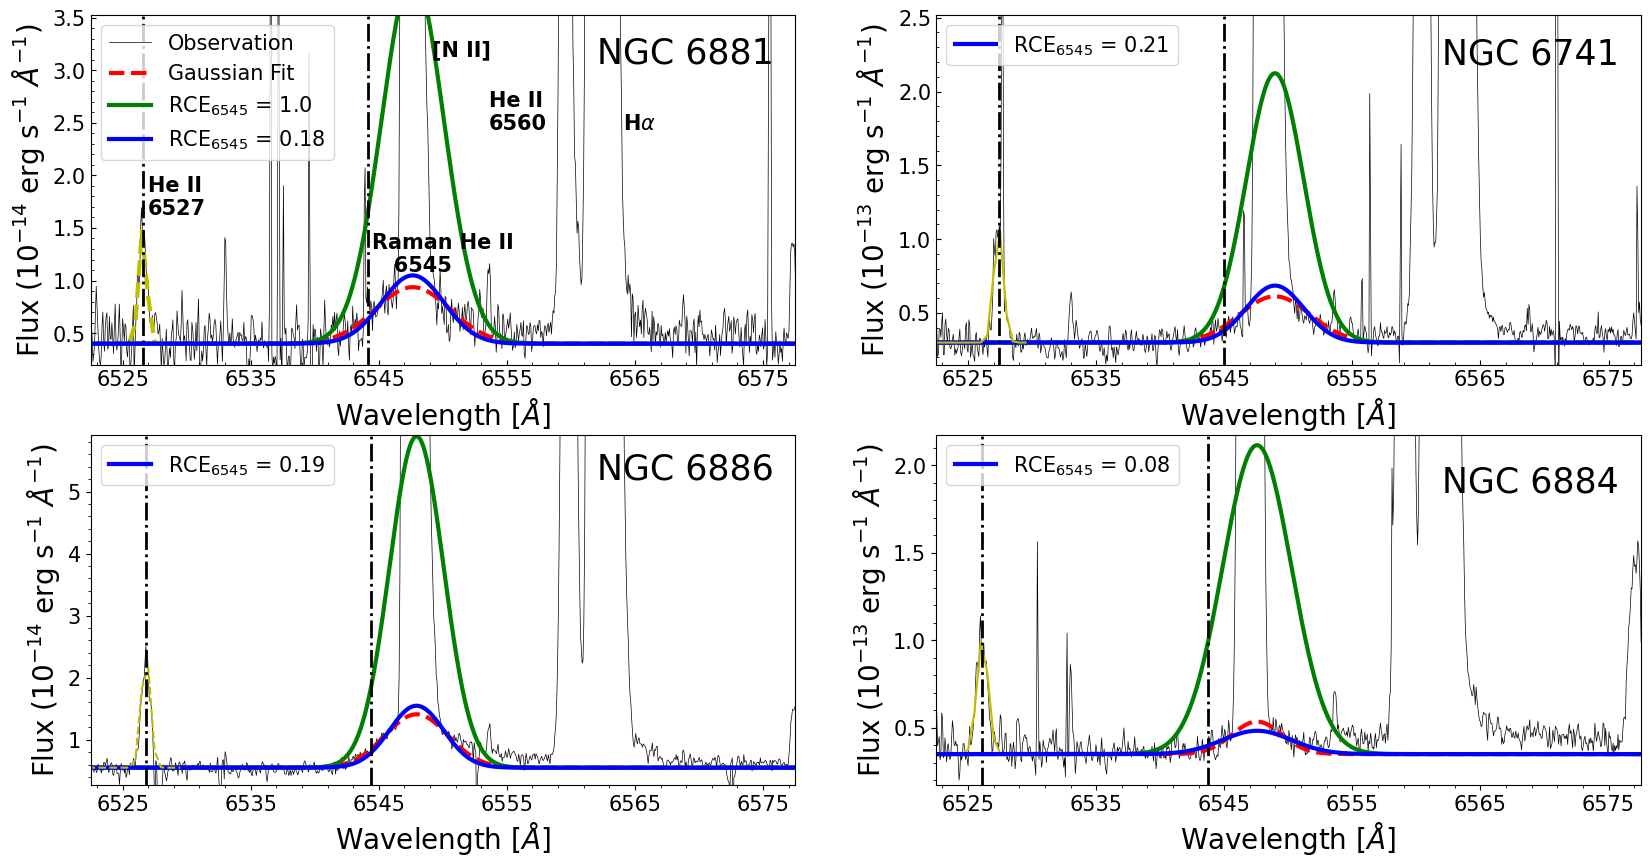

In [14]:
fig=plt.figure(1,figsize=(20,10))

plt.subplot(221)
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.4e-14
vel = 16.855
he_line = 6559.57
r_he_line =  6547.65
sigma = 0.38


F_0 = 2.8322e-13 - Fc
# F_0 = 2.93e-13 - Fc
F_Raman_D = 9.37e-15 - Fc
sigma_D =2.94
# sigma_D =1.94
# plt.subplot(121)

y_ff = 1e14 
plt.plot(lam,flux*y_ff,'k',lw=0.5,label='Observation')

f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR*y_ff,'r--',lw=3,label='Gaussian Fit')
aa= np.argmax(f_DR)
# plt.text(x[aa],f_DR[aa],'Raman 6545')



x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 1.509e-14 - Fc
lam_6527 =6526.58
sig_6527 = 0.31 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527*y_ff,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=20)
plt.xlabel(r'Wavelength $[\AA]$',fontsize=20)
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff)
plt.minorticks_on()

plt.text(x_max-13,F_6527_p*2.77*y_ff ,'NGC 6881',size=25)

ii = 1.0
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc)
plt.plot(x,f_R*y_ff,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
plt.vlines(lam_6527+ del_lam,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
# # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

# x_flux = np.arange(x_min,x_max,0.01)
# print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
ef = 1.0
f_R_1 =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x,f_R*y_ff,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))

size= 15
aa_6545 = np.argmax(f_DR)
plt.text(x[aa_6545]-3.2,(f_DR[aa_6545]+1.5e-15)*y_ff,'Raman He II\n   6545',size=size,fontweight='bold')
plt.text(x[aa_6545]+1.5,(f_DR[aa_6545]+2.2e-14)*y_ff,'[N II]',size=size,fontweight='bold')

aa_6527 = np.argmax(f_6527)
plt.text(x_6527[aa_6527]+0.5,(f_6527[aa_6527]+1.5e-15)*y_ff,'He II \n6527',size=size,fontweight='bold')

aa_6560 = np.argmax(f)
plt.text(x[aa_6560]-6,(f_DR[aa_6545]+1.5e-14)*y_ff,'He II \n6560',size=size,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(x[aa_6560]+4.5,(f_DR[aa_6545]+1.5e-14)*y_ff,r'H$\alpha$',size=size,fontweight='bold')
plt.tick_params(axis='both', direction='in', which='both')
plt.legend(loc='upper left',fontsize=15)

lam_c_6527 = lam_6527

plt.subplot(222)
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()

Fc = 0.3e-13
F_0 = 1.48e-12 - Fc
he_line = 6560.47
r_he_line = 6548.96  

sigma = 0.35
F_Raman_D = 6.13e-14 - Fc
sigma_D = 2.76 

F_6527_p =1.09e-13 - Fc
lam_6527 = 6527.38 
sig_6527 = 0.37


dlam = 0

y_ff = 1e13
# plt.subplot(121)
plt.plot(lam+dlam,flux*y_ff,'k',lw=0.5) #,label='Observation'
f = Flux(F_0,x+dlam,he_line+dlam,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x+dlam,r_he_line+dlam,sigma_D,Fc)
# plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x+dlam,f_DR*y_ff,'r--',lw=3) #,label='Gaussian Fit'
aa= np.argmax(f_DR)


ratio = 6560.47 / 1025.27



ef = 1.0
f_R =R_Flux(F_0,x+dlam,r_he_line+dlam,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x+dlam,f_R*y_ff,'g',lw=3) # ,label=r'RCE$_{0}$ = {1}'.format({6454},ef)


tot_f_ram_1 = total_flux(f_R,x+dlam,Fc)
tot_f_obv_ram = total_flux(f_DR,x+dlam,Fc)
ef = tot_f_obv_ram / tot_f_ram_1

f_R =R_Flux(F_0,x+dlam,r_he_line+dlam,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x+dlam,f_R*y_ff,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))

x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(F_6527_p,x_6527+dlam,lam_6527+dlam,sig_6527,Fc)
plt.plot(x_6527+dlam,f_6527*y_ff,'y')


# plt.title('NGC 6741')
x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.text(x_max-13,F_6527_p*2.77*y_ff ,'NGC 6741',size=25)
plt.ylabel(r'Flux ($10^{-13}$ erg s$^{-1}$ $ \AA^{-1}$)')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim((Fc*0.5)*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff)
lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527+dlam,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
plt.vlines(lam_6527+ del_lam+dlam,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
plt.xlabel(r'Wavelength $[\AA]$',fontsize=20)
plt.ylabel(r'Flux ($10^{-13}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=20)
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff)
# ax = plt.gca()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.legend(loc='upper left',fontsize=15)
plt.minorticks_on()
plt.tick_params(axis='both', direction='in', which='both')
# plt.minorticks_on()



plt.subplot(224)
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()

y_ff = 1e13

Fc = 3.5e-14
vel = 16.855
he_line = 6559.12  
r_he_line = 6547.56
F_0 = 1.43791e-12 - Fc
sigma = 0.42

F_Raman_D = 5.355e-14 - Fc
sigma_D = 1.93

F_6527_p = 1.0165e-13 - Fc
lam_6527 = 6526.13 
sig_6527 = 0.44 

dlam = 0



plt.plot(lam+dlam,flux*y_ff,'k',lw=0.5) # ,label='Observation'
f = Flux(F_0,x+dlam,he_line+dlam,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x+dlam,r_he_line+dlam,sigma_D,Fc)
# plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x+dlam,f_DR*y_ff,'r--',lw=3) #,label='Gaussian Fit'


# ii = 0.098
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc) 
# plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))
# aa = np.argmax(f_R)
# plt.text(x[aa],f_R[aa],'Raman 6545')

ii = 1.0
f_R =R_Flux(F_0,x+dlam,r_he_line+dlam,sigma,ratio_6560,total_f_ratio ,ii,Fc)
plt.plot(x+dlam,f_R*y_ff,'g',lw=3) # ,label=r'RCE$_{0}$ = {1}'.format({6545},ii)





x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(F_6527_p,x_6527+dlam,lam_6527+dlam,sig_6527,Fc)
plt.plot(x_6527+dlam,f_6527*y_ff,'y')

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.text(x_max-13,F_6527_p*2.77*y_ff ,'NGC 6884',size=25)


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527+dlam,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
plt.vlines(lam_6527+ del_lam+dlam,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)


x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x+dlam,r_he_line+dlam,sigma_D,Fc)
ef = 1.0
f_R_1 =R_Flux(F_0,x+dlam,r_he_line+dlam,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x+dlam,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x+dlam,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_0,x+dlam,r_he_line+dlam,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x+dlam,f_R*y_ff,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))

plt.xlabel(r'Wavelength $[\AA]$',fontsize=20)
plt.ylabel(r'Flux ($10^{-13}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=20)
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff)
plt.yticks([0.5,1.0,1.5,2.0])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc='upper left',fontsize=15)
plt.minorticks_on()



plt.subplot(223)
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.55e-14
vel = 16.855
he_line = 6559.83 
r_he_line =  6547.95 
sigma = 0.33


F_0 = 4.30e-13 - Fc
F_Raman_D = 1.41e-14 - Fc
sigma_D =2.45 

F_6527_p = 2.43e-14 - Fc
lam_6527 = 6526.81 
sig_6527 = 0.35 

dlam =0
y_ff = 1e14

plt.plot(lam+dlam,flux*y_ff,'k',lw=0.5) #,label='Observation'
f = Flux(F_0,x+dlam,he_line+dlam,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x+dlam,r_he_line+dlam,sigma_D,Fc)

# plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x+dlam,f_DR*y_ff,'r--',lw=3) # ,label='Gaussian Fit'


# ii = 0.17
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc)
# plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))
ii = 1.0
f_R =R_Flux(F_0,x+dlam,r_he_line+dlam,sigma,ratio_6560,total_f_ratio ,ii,Fc)
plt.plot(x,f_R*y_ff,'g',lw=3) #,label=r'RCE$_{0}$ = {1}'.format({6545},ii)

ef = 1.0
f_R_1 =R_Flux(F_0,x+dlam,r_he_line+dlam,sigma,ratio,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x+dlam,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x+dlam,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

# ef = 0.17
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
# plt.plot(x,f_R,'c',lw=3,label=r'Eye, RCE$_{0}$ = {1}'.format({6545},ef))

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_0,x+dlam,r_he_line+dlam,sigma,ratio,total_f_ratio ,ef,Fc)
plt.plot(x+dlam,f_R*y_ff,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))




x_6527 = np.arange(6510,6530,0.5)
f_6527 = Flux(F_6527_p,x_6527+dlam,lam_6527+dlam,sig_6527,Fc)
plt.plot(x_6527+dlam,f_6527*y_ff,'y--')

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=20)
plt.xlabel(r'Wavelength $[\AA]$',fontsize=20)
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff)
plt.text(x_max-13,F_6527_p*2.77*y_ff ,'NGC 6886',size=25)

lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527+dlam,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
plt.vlines(lam_6527+ del_lam+dlam,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.minorticks_on()
plt.legend(loc='upper left',fontsize=15)


# plt.savefig(r'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/RCE_figures.pdf', bbox_inches='tight')


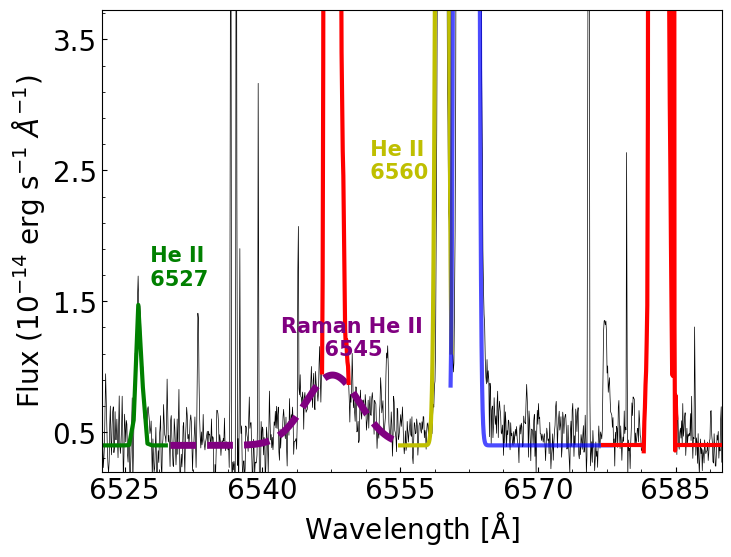

In [15]:
fig=plt.figure(1,figsize=(8,6))

path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()


x=np.arange(4000,7000,0.001)
x_6545 = np.arange(6530,6555,0.001)
x_6560 = np.arange(6555,6560.6,0.001)
x_Ha = np.arange(6560.5,6578,0.001)


Fc = 0.4e-14
vel = 16.855
he_line = 6559.57
r_he_line =  6547.65
sigma = 0.38
Ha_line = lam[np.argmax(flux)] 

sigma_Ha = 0.44

F_0 = 2.8322e-13 - Fc
F_Ha = 9.158738e-12 - Fc
F_Raman_D = 9.37e-15 - Fc
sigma_D =2.94
# sigma_D =1.94
# plt.subplot(121)

y_ff = 1e14 
plt.plot(lam,flux*y_ff,'k',lw=0.5,label='Observation')

f_Ha = Flux(F_Ha,x_Ha,Ha_line,sigma_Ha,Fc)


f = Flux(F_0,x_6560,he_line,sigma,Fc)

f_DR = Data_R_Flux(F_Raman_D,x_6545,r_he_line,sigma_D,Fc)
plt.plot(x_6560,f*y_ff,'y-',lw=3,alpha=1.0,label=r'He II {0}'.format(he_line))

plt.plot(x_6545,f_DR*y_ff,'--',color='purple',lw=5,label='Gaussian Fit')
aa= np.argmax(f_DR)
# plt.text(x[aa],f_DR[aa],'Raman 6545')
plt.plot(x_Ha,f_Ha*y_ff,'-',color='b',alpha=0.7,lw=3,label='Halpha')


x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 1.509e-14 - Fc
lam_6527 =6526.58
sig_6527 = 0.31 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527*y_ff,'g-',lw=3)
x_test = lam

x_c = 6547.5
x_1 = np.where((x_test <= x_c) & (x_test >= 6546.5) )
x_2 = np.where((x_test >= x_c) & (x_test <= 6549.46))

# 추출된 인덱스를 사용하여 y 값 추출
y_1 = flux[x_1] 
y_2 = flux[x_2]

# 해당 x 값 추출
x_1 = x_test[x_1]
x_2 = x_test[x_2]

# 플롯
plt.plot(x_1, y_1*y_ff, '-',color= 'r' ,lw=3)
plt.plot(x_2, y_2*y_ff, '-', color='r' ,lw=3)


x_test = lam
x_c = 6583

x_1 = np.where((lam <= x_c) & (lam >= 6581.5) )
x_2 = np.where((lam >= x_c) & (lam <= 6585.1))

# 추출된 인덱스를 사용하여 y 값 추출
y_1 = flux[x_1]
y_2 = flux[x_2]

# 해당 x 값 추출
x_1 = x_test[x_1]
x_2 = x_test[x_2]

xmin_norm = (6578 - x_min-2.5) / (6590 - x_min-2.5) 
xmax_norm = (6582 -x_min-2.5) / (6590 -x_min-2.5) 
plt.axhline(y=0.4, xmin=xmin_norm, xmax=xmax_norm, color='r', linestyle='-', lw=3)

plt.plot(x_1, y_1*y_ff, '-',color='r',lw=3)
plt.plot(x_2, y_2*y_ff, '-',color='r',lw=3)
xmin_norm = (6585.5 - x_min-2.5) / (6590 - x_min-2.5) 
xmax_norm = (6590 -x_min-2.5) / (6590 -x_min-2.5) 
plt.axhline(y=0.4, xmin=xmin_norm, xmax=xmax_norm, color='r', linestyle='-', lw=3)



lam_c_6527 = lam_6527



# plt.text(x_min+2,F_6527_p*2.77*y_ff ,'NGC 6881',size=25)


# lam_0_6527= 6527.1
# lam_0_6545 = 6544.7
# del_lam = (lam_0_6545 - lam_0_6527 )
# plt.vlines(lam_6527,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
# plt.vlines(lam_6527+ del_lam,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)



size= 15
aa_6545 = np.argmax(f_DR)
plt.text(6542,(f_DR[aa_6545]+1.5e-15)*y_ff,'Raman He II \n      6545',size=size,fontweight='bold',color='purple')
# plt.text(6549,(f_DR[aa_6545]+2.0e-14)*y_ff,' [N II]\n 6548',size=size,fontweight='bold')

# aa_6527 = np.argmax(f_6527)
plt.text(x_6527[aa_6527]+0.5,(f_6527[aa_6527]+1.5e-15)*y_ff,' He II \n 6527',size=size,fontweight='bold',color='g')
plt.text(6560-9,(f_DR[aa_6545]+1.5e-14)*y_ff,' He II \n 6560',size=size,fontweight='bold',color='y')

# plt.text(6560+4.5,(f_DR[aa_6545]+1.5e-14)*y_ff,r'H$\alpha$',size=size,fontweight='bold')
# plt.text(6575.5,(f_DR[aa_6545]+2.0e-14)*y_ff,' [N II]\n 6583',size=size,fontweight='bold')

plt.tick_params(axis='both', direction='in', which='both')
# plt.legend(loc='upper left',fontsize=15)



x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,6590)
plt.ylabel(r'Flux ($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=20)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=20)
plt.xticks(np.arange(x_min,6590,15),fontsize=20)
plt.ylim(Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff+0.2)
plt.yticks([0.5,1.5,2.5,3.5],fontsize=20)
plt.minorticks_on()

# plt.savefig(r'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/optical', bbox_inches='tight')


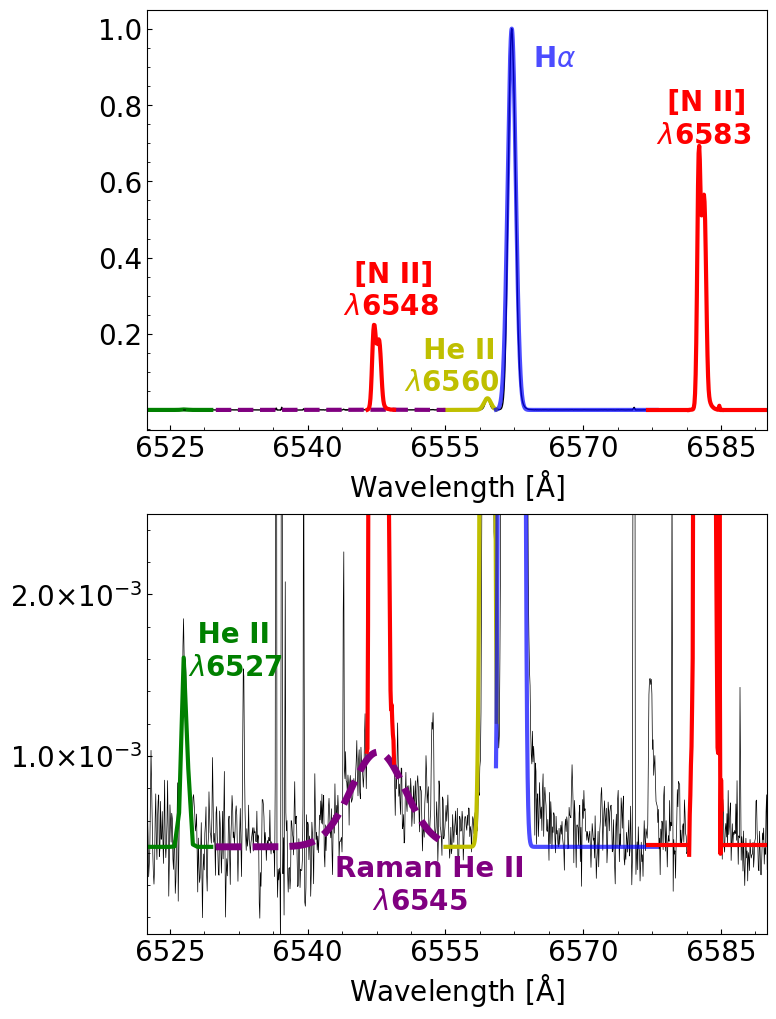

In [36]:
fig=plt.figure(1,figsize=(8,12))

plt.subplot(211)
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()


x=np.arange(4000,7000,0.001)
x_6545 = np.arange(6530,6555,0.001)
x_6560 = np.arange(6555,6560.5,0.001)
x_Ha = np.arange(6560.5,6578,0.001)
F_Ha = 9.158738e-12 - Fc
Fc = 0.4e-14

plt.plot(lam,flux/F_Ha,'k',lw=1,label='Observation')

vel = 16.855
he_line = 6559.57
r_he_line =  6547.65
sigma = 0.38
Ha_line = lam[np.argmax(flux)] 

sigma_Ha = 0.44

F_0 = 2.8322e-13 - Fc
F_Ha = 9.158738e-12 - Fc
F_Raman_D = 9.37e-15 - Fc
sigma_D =2.94
# # sigma_D =1.94

# y_ff = 1e12 


f_Ha = Flux(F_Ha,x_Ha,Ha_line,sigma_Ha,Fc)


f = Flux(F_0,x_6560,he_line,sigma,Fc)

f_DR = Data_R_Flux(F_Raman_D,x_6545,r_he_line,sigma_D,Fc)
plt.plot(x_6560,f/F_Ha,'y-',lw=3,alpha=1.0,label=r'He II {0}'.format(he_line))

plt.plot(x_6545,f_DR/F_Ha,'--',color='purple',lw=3,label='Gaussian Fit')
aa= np.argmax(f_DR)
# plt.text(x[aa],f_DR[aa],'Raman 6545')
plt.plot(x_Ha,f_Ha/F_Ha,'-',color='b',lw=3,alpha = 0.7 ,label='Halpha')


x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 1.509e-14 - Fc
lam_6527 =6526.58
sig_6527 = 0.31 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527/F_Ha,'g-',lw=3)
x_test = lam

x_c = 6547.5
x_1 = np.where((x_test <= x_c) & (x_test >= 6546.5) )
x_2 = np.where((x_test >= x_c) & (x_test <= 6549.46))

# 추출된 인덱스를 사용하여 y 값 추출
y_1 = flux[x_1] 
y_2 = flux[x_2]

# 해당 x 값 추출
x_1 = x_test[x_1]
x_2 = x_test[x_2]

# 플롯
plt.plot(x_1, y_1/F_Ha, '-',color= 'r' ,lw=3)
plt.plot(x_2, y_2/F_Ha, '-', color='r' ,lw=3)


x_test = lam
x_c = 6583

x_1 = np.where((lam <= x_c) & (lam >= 6581.5) )
x_2 = np.where((lam >= x_c) & (lam <= 6585.1))

# 추출된 인덱스를 사용하여 y 값 추출
y_1 = flux[x_1]
y_2 = flux[x_2]

# 해당 x 값 추출
x_1 = x_test[x_1]
x_2 = x_test[x_2]

xmin_norm = (6578 - x_min-2.5) / (6590 - x_min-2.5) 
xmax_norm = (6582 -x_min-2.5) / (6590 -x_min-2.5) 
plt.axhline(y=0, xmin=xmin_norm, xmax=xmax_norm, color='r', linestyle='-', lw=3)

plt.plot(x_1, y_1/F_Ha, '-',color='r',lw=3)
plt.plot(x_2, y_2/F_Ha, '-',color='r',lw=3)
xmin_norm = (6585.5 - x_min-2.5) / (6590 - x_min-2.5) 
xmax_norm = (6590 -x_min-2.5) / (6590 -x_min-2.5) 
plt.axhline(y=0, xmin=xmin_norm, xmax=xmax_norm, color='r', linestyle='-', lw=3)


plt.vlines(lam_6527,Fc*0.5/F_Ha,(F_6527_p*3 + Fc*0.5)/F_Ha,colors='k',linestyles='-.',lw=2)
plt.vlines(lam_6527+ del_lam,Fc*0.5/F_Ha,(F_6527_p*3 + Fc*0.5)/F_Ha,colors='k',linestyles='-.',lw=2)

size= 15
aa_6545 = np.argmax(f_DR)

plt.tick_params(axis='both', direction='in', which='both')
# plt.legend(loc='upper left',fontsize=15)




size= 20
aa_6545 = np.argmax(f_DR)
plt.text(6550.5,0.05,'  He II \n$\\lambda$6560',size=size,fontweight='bold',color='y')
plt.text(6545-2,0.25,'  [N II]\n $\\lambda$6548',size=size,fontweight='bold',color='r')
plt.text(6560+4.5,0.9,r'H$\alpha$',size=size,fontweight='bold',color='blue',alpha=0.7)
plt.text(6577,0.7,'  [N II]\n $\\lambda$6583',size=size,fontweight='bold',color='r')

# plt.text(x_min+2,8 ,'NGC 6881',size=25,fontweight='bold')

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,6590)
# plt.ylim(-1,10)
# plt.ylabel(r'Relative Flux',fontsize=20)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=20)
plt.xticks(np.arange(x_min,6590,15),fontsize=20)
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()

plt.subplot(212)
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()


x=np.arange(4000,7000,0.001)
x_6545 = np.arange(6530,6555,0.001)
x_6560 = np.arange(6555,6560.6,0.001)
x_Ha = np.arange(6560.5,6578,0.001)


Fc = 0.4e-14
vel = 16.855
he_line = 6559.57
r_he_line =  6547.65
sigma = 0.38
Ha_line = lam[np.argmax(flux)] 

sigma_Ha = 0.44

F_0 = 2.8322e-13 - Fc
F_Ha = (9.158738e-12 - Fc)/1e3
F_Raman_D = 9.37e-15 - Fc
sigma_D =2.94
# sigma_D =1.94
# plt.subplot(121)

y_ff = 1e14 
plt.plot(lam,flux/F_Ha,'k',lw=0.5,label='Observation')

f_Ha = Flux(F_Ha*1e3,x_Ha,Ha_line,sigma_Ha,Fc)


f = Flux(F_0,x_6560,he_line,sigma,Fc)

f_DR = Data_R_Flux(F_Raman_D,x_6545,r_he_line,sigma_D,Fc)
plt.plot(x_6560,f/F_Ha,'y-',lw=3,alpha=1.0,label=r'He II {0}'.format(he_line))

plt.plot(x_6545,f_DR/F_Ha,'--',color='purple',lw=5,label='Gaussian Fit')
aa= np.argmax(f_DR)
# plt.text(x[aa],f_DR[aa],'Raman 6545')
plt.plot(x_Ha,f_Ha/F_Ha,'-',color='b',alpha=0.7,lw=3,label='Halpha')


x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 1.509e-14 - Fc
lam_6527 =6526.58
sig_6527 = 0.31 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527/F_Ha,'g-',lw=3)
x_test = lam

x_c = 6547.5
x_1 = np.where((x_test <= x_c) & (x_test >= 6546.38) )
x_2 = np.where((x_test >= x_c) & (x_test <= 6549.46))

# 추출된 인덱스를 사용하여 y 값 추출
y_1 = flux[x_1] 
y_2 = flux[x_2]

# 해당 x 값 추출
x_1 = x_test[x_1]
x_2 = x_test[x_2]

# 플롯
plt.plot(x_1, y_1/F_Ha, '-',color= 'r' ,lw=3)
plt.plot(x_2, y_2/F_Ha, '-', color='r' ,lw=3)


x_test = lam
x_c = 6583

x_1 = np.where((lam <= x_c) & (lam >= 6581.5) )
x_2 = np.where((lam >= x_c) & (lam <= 6585.1))

# 추출된 인덱스를 사용하여 y 값 추출
y_1 = flux[x_1]
y_2 = flux[x_2]

# 해당 x 값 추출
x_1 = x_test[x_1]
x_2 = x_test[x_2]

xmin_norm = (6578 - x_min-2.5) / (6590 - x_min-2.5) 
xmax_norm = (6582 -x_min-2.5) / (6590 -x_min-2.5) 
plt.axhline(y=0.45, xmin=xmin_norm, xmax=xmax_norm, color='r', linestyle='-', lw=3)

plt.plot(x_1, y_1/F_Ha, '-',color='r',lw=3)
plt.plot(x_2, y_2/F_Ha, '-',color='r',lw=3)
xmin_norm = (6585.5 - x_min-2.5) / (6590 - x_min-2.5) 
xmax_norm = (6590 -x_min-2.5) / (6590 -x_min-2.5) 
plt.axhline(y=0.45, xmin=xmin_norm, xmax=xmax_norm, color='r', linestyle='-', lw=3)



lam_c_6527 = lam_6527



# plt.text(x_min+2,F_6527_p*2.77*y_ff ,'NGC 6881',size=25)


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.vlines(lam_6527,-0.1,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
# plt.vlines(lam_6527+ del_lam,-0.1,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)



size= 20

plt.text(6543,0.05,'Raman He II\n    $\\lambda$6545',size=size,fontweight='bold',color='purple',alpha=1.0)
plt.text(6527, 1.5, ' He II\n$\\lambda$6527', size=size, fontweight='bold', color='g')
plt.tick_params(axis='both', direction='in', which='both')
x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,6590)
# plt.ylabel(r'Relative Flux  [$\times 10^{-3}$]',fontsize=20)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=20)
plt.xticks(np.arange(x_min,6590,15),fontsize=20)
plt.ylim(-0.1,2.5)
ytick_positions = [1.0, 2.0]

# Y 축 눈금 레이블 설정
ytick_labels = [r'1.0$\times 10^{-3}$', r'2.0$\times 10^{-3}$']

# Y 축 눈금과 레이블 적용
plt.yticks(ytick_positions, ytick_labels, fontsize=20)
plt.minorticks_on()


plt.savefig(r'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/optical_strong', bbox_inches='tight')


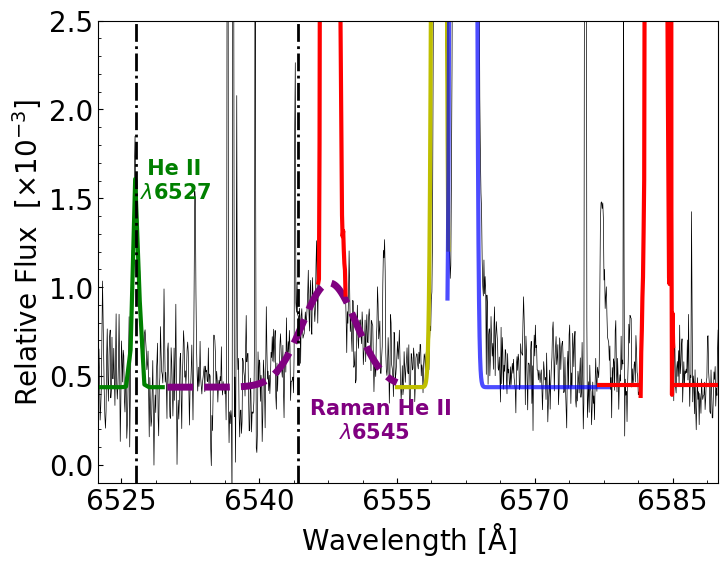

In [17]:
fig=plt.figure(1,figsize=(8,6))

path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()


x=np.arange(4000,7000,0.001)
x_6545 = np.arange(6530,6555,0.001)
x_6560 = np.arange(6555,6560.6,0.001)
x_Ha = np.arange(6560.5,6578,0.001)


Fc = 0.4e-14
vel = 16.855
he_line = 6559.57
r_he_line =  6547.65
sigma = 0.38
Ha_line = lam[np.argmax(flux)] 

sigma_Ha = 0.44

F_0 = 2.8322e-13 - Fc
F_Ha = (9.158738e-12 - Fc)/1e3
F_Raman_D = 9.37e-15 - Fc
sigma_D =2.94
# sigma_D =1.94
# plt.subplot(121)

y_ff = 1e14 
plt.plot(lam,flux/F_Ha,'k',lw=0.5,label='Observation')

f_Ha = Flux(F_Ha*1e3,x_Ha,Ha_line,sigma_Ha,Fc)


f = Flux(F_0,x_6560,he_line,sigma,Fc)

f_DR = Data_R_Flux(F_Raman_D,x_6545,r_he_line,sigma_D,Fc)
plt.plot(x_6560,f/F_Ha,'y-',lw=3,alpha=1.0,label=r'He II {0}'.format(he_line))

plt.plot(x_6545,f_DR/F_Ha,'--',color='purple',lw=5,label='Gaussian Fit')
aa= np.argmax(f_DR)
# plt.text(x[aa],f_DR[aa],'Raman 6545')
plt.plot(x_Ha,f_Ha/F_Ha,'-',color='b',alpha=0.7,lw=3,label='Halpha')


x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 1.509e-14 - Fc
lam_6527 =6526.58
sig_6527 = 0.31 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527/F_Ha,'g-',lw=3)
x_test = lam

x_c = 6547.5
x_1 = np.where((x_test <= x_c) & (x_test >= 6546.38) )
x_2 = np.where((x_test >= x_c) & (x_test <= 6549.46))

# 추출된 인덱스를 사용하여 y 값 추출
y_1 = flux[x_1] 
y_2 = flux[x_2]

# 해당 x 값 추출
x_1 = x_test[x_1]
x_2 = x_test[x_2]

# 플롯
plt.plot(x_1, y_1/F_Ha, '-',color= 'r' ,lw=3)
plt.plot(x_2, y_2/F_Ha, '-', color='r' ,lw=3)


x_test = lam
x_c = 6583

x_1 = np.where((lam <= x_c) & (lam >= 6581.5) )
x_2 = np.where((lam >= x_c) & (lam <= 6585.1))

# 추출된 인덱스를 사용하여 y 값 추출
y_1 = flux[x_1]
y_2 = flux[x_2]

# 해당 x 값 추출
x_1 = x_test[x_1]
x_2 = x_test[x_2]

xmin_norm = (6578 - x_min-2.5) / (6590 - x_min-2.5) 
xmax_norm = (6582 -x_min-2.5) / (6590 -x_min-2.5) 
plt.axhline(y=0.45, xmin=xmin_norm, xmax=xmax_norm, color='r', linestyle='-', lw=3)

plt.plot(x_1, y_1/F_Ha, '-',color='r',lw=3)
plt.plot(x_2, y_2/F_Ha, '-',color='r',lw=3)
xmin_norm = (6585.5 - x_min-2.5) / (6590 - x_min-2.5) 
xmax_norm = (6590 -x_min-2.5) / (6590 -x_min-2.5) 
plt.axhline(y=0.45, xmin=xmin_norm, xmax=xmax_norm, color='r', linestyle='-', lw=3)



lam_c_6527 = lam_6527



# plt.text(x_min+2,F_6527_p*2.77*y_ff ,'NGC 6881',size=25)


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,-0.1,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
plt.vlines(lam_6527+ del_lam,-0.1,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)



size= 15

plt.text(6545.5,0.15,'Raman He II\n    $\\lambda$6545',size=size,fontweight='bold',color='purple',alpha=1.0)
plt.text(6527, 1.5, ' He II\n$\\lambda$6527', size=size, fontweight='bold', color='g')
plt.tick_params(axis='both', direction='in', which='both')
x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,6590)
plt.ylabel(r'Relative Flux  [$\times 10^{-3}$]',fontsize=20)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=20)
plt.xticks(np.arange(x_min,6590,15),fontsize=20)
plt.ylim(-0.1,2.5)
plt.yticks(fontsize=20)
plt.minorticks_on()

plt.savefig(r'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/optical', bbox_inches='tight')


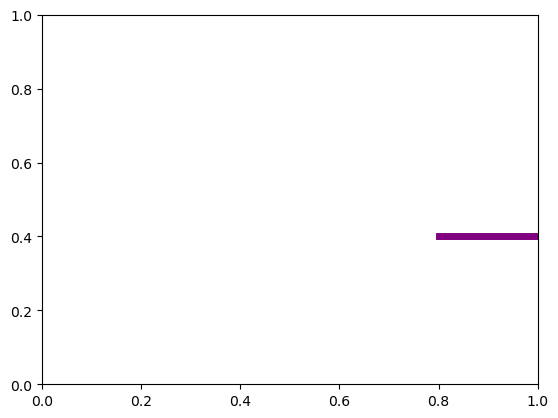

In [18]:
plt.axhline(y=0.4,xmin = 0.8, xmax =1.0, color='purple',linestyle='-',lw=5)

In [19]:
# plt.text(x_max-13,F_6527_p*2.77*y_ff ,'NGC 6881',size=25)

# ii = 1.0
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio_6560,total_f_ratio ,ii,Fc)
# # plt.plot(x,f_R*y_ff,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ii))

# lam_0_6527= 6527.1
# lam_0_6545 = 6544.7
# del_lam = (lam_0_6545 - lam_0_6527 )
# plt.vlines(lam_6527,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
# plt.vlines(lam_6527+ del_lam,Fc*0.5*y_ff,(F_6527_p*3 + Fc*0.5)*y_ff,colors='k',linestyles='-.',lw=2)
# # # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))

# # x_flux = np.arange(x_min,x_max,0.01)
# # print(len(x_flux))
# f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
# ef = 1.0
# f_R_1 =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)

# tot_f_ram_1 = total_flux(f_R_1,x,Fc)
# print('Total flux of RCE 1 case is = ',tot_f_ram_1)

# tot_f_obv_ram = total_flux(f_DR,x,Fc)
# print('Total flux of Observed case is = ',tot_f_obv_ram)

# print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

# ef = tot_f_obv_ram / tot_f_ram_1
# f_R =R_Flux(F_0,x,r_he_line,sigma,ratio,total_f_ratio ,ef,Fc)
# # plt.plot(x,f_R*y_ff,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},ef))

# size= 15
# aa_6545 = np.argmax(f_DR)
# plt.text(x[aa_6545]-3.2,(f_DR[aa_6545]+1.5e-15)*y_ff,'Raman He II\n   6545',size=size,fontweight='bold')
# plt.text(x[aa_6545]+1.5,(f_DR[aa_6545]+2.2e-14)*y_ff,'[N II]',size=size,fontweight='bold')

# aa_6527 = np.argmax(f_6527)
# plt.text(x_6527[aa_6527]+0.5,(f_6527[aa_6527]+1.5e-15)*y_ff,'He II \n6527',size=size,fontweight='bold')

# aa_6560 = np.argmax(f)
# plt.text(x[aa_6560]-6,(f_DR[aa_6545]+1.5e-14)*y_ff,'He II \n6560',size=size,fontweight='bold')
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.text(x[aa_6560]+4.5,(f_DR[aa_6545]+1.5e-14)*y_ff,r'H$\alpha$',size=size,fontweight='bold')
# plt.tick_params(axis='both', direction='in', which='both')
# plt.legend(loc='upper left',fontsize=15)
